<a href="https://colab.research.google.com/github/AI-FREE-Team/Machine-Learning-Basic/blob/master/Materials/%E8%A6%96%E8%A6%BA%E5%8C%96_%E6%8A%98%E7%B7%9A%E5%9C%96_%E9%9D%A2%E7%A9%8D%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>

# 前言

本文開始帶領大家以視覺化的統計圖表探索資料，將介紹 <font color="#00dd00">**Line Chart**</font> 和 <font color="#00dd00">**Area Plot**</font> ，讓大家瞭解如何善用統計圖表說明資料。在開始之前別忘了匯入中文字型喔！要先把檔案放到右側 file 夾中，確認上傳完成後再執行下面的語法

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont( 'taipei_sans_tc_beta.ttf' )
mpl.rc( 'font', family='Taipei Sans TC Beta' )

## 匯入基本套件

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2


## 簡介資料集

### 資料集03 - Wine Reviews

* 資料來源：自 Kaggle 上 [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) 取得
<br>
* 資料說明：在 2017 年 6 月 15 日那周從 [WineEnthusiast](https://www.winemag.com/?s=&drink_type=wine) 取得。
<br>
* Kaggle 目標：根據侍酒師的評論來識別葡萄酒的品種。

In [ ]:
wine_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/視覺化/Input/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

# 折線圖/趨勢線 (Line Chart)

折線圖 (Line Chart) 常用來觀察資料的變化趨勢，如：公司每月的營收、網站一天中各時段的瀏覽量等。</br>

## 實際應用：COVID-19

In [ ]:
#@markdown 資料來源：[Our World in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=earliest..2021-05-03&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Align+outbreaks=false&country=USA~GBR~DEU~CHN~KOR~TWN~JPN)

from IPython.core.display import HTML

HTML('<iframe src="https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=earliest..2021-05-03&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Align+outbreaks=false&country=USA~GBR~DEU~CHN~KOR~TWN~JPN&hideControls=true" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>' )

* 資料特性：會隨時間變動
* 指令：[`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
* 說明：可在直角坐標平面中繪製折線圖
* 常用參數
  * linestyle (ls)：線條的樣式，其他的樣式請參考 [Linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
    * '-'：實線
    * '--'：虛線
    * '_.'：點虛線
    * ':'：點線
  * linewidth (lw)：線條的寬度    
  * marker：標記點的樣式，其他的樣式請參考 [matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
    * 'o'：圓圈 
    * '*'：星號
    * '+'：加號   
  * markersize：標記點的大小
  * color：線條與標記點的顏色，可透過顏色代號或 RGB 序對進行設定，下列為常用的顏色代號與序對  
    * 紅色：'r' / (1,0,0) 
    * 綠色：'g' / (0,1,0) 
    * 藍色：'b' / (0,0,1) 
    * 黃色：'y' / (1,1,0)   
  * alpha：折線圖的透明度，參數範圍為 $[0,1]$，其中，0 表示完全透明，1 表示不透明。

## 小範例

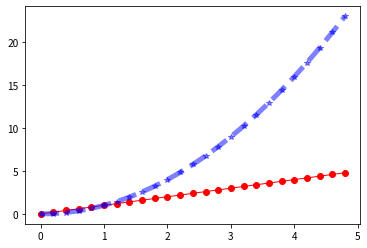

In [ ]:
# Data 
x = np.arange(0,5,0.2)
y1 = x 
y2 = x**2

# 折線圖 Line Chart
plt.plot( x, y1, linestyle='-', linewidth=1, marker='o', color='r' )
plt.plot( x, y2, linestyle='--', linewidth=5, marker='*', color='b', alpha=0.5 )

plt.show()

## 實作範例 - COVID-19 疫情

* 資料來源 : [COVID-19 全球疫情地圖](https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php?downloadall=yes) COVID-19 疫情紀錄表單  
* 資料下載時間 : 2021/6/12 09:15 PM

### Step 1：匯入資料

首先，透過程式碼將資料集檔案 (excel) 從 GitHub 下載

In [ ]:
!git clone https://github.com/AI-FREE-Team/Machine-Learning-Basic.git

Cloning into 'Machine-Learning-Basic'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 164 (delta 64), reused 68 (delta 16), pack-reused 0
Receiving objects: 100% (164/164), 11.61 MiB | 22.65 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
#若需要重新下載資料，語法：
#!rm -r /content/Machine-Learning-Basic

In [ ]:
# 匯入 xlsx 檔
raw_data = pd.read_excel( '/content/Machine-Learning-Basic/Content/COVID-19/owl_tw.xlsx', header=1  )
raw_data.head()

,ID,iso_code,洲名,國家,日期,總確診數,新增確診數,七天移動平均新增確診數,總死亡數,新增死亡數,七天移動平均新增死亡數,每百萬人確診數,每百萬人死亡數,傳染率,新增檢驗件數,總檢驗件數,每千人檢驗件數,七天移動平均新增檢驗件數,陽性率,每確診案例相對檢驗數量,疫苗總接種總劑數,疫苗總接種人數,疫苗新增接種劑數,七天移動平均疫苗新增接種劑數,每百人接種疫苗劑數,每百人接種疫苗人數,疫情控管指數,總人口數,中位數年紀,70歲以上人口比例,平均壽命
0,513,TWN,亞洲,台灣,2021-06-11,12500,278,293.429,385,24,28.286,524.840,16.165,0.00,0,0,0.000,0,0.000,0.0,799129,799129,16829,17244,3.36,3.36,0.0,23816775,42.2,8.353,80.46
1,512,TWN,亞洲,台灣,2021-06-10,12222,254,321.143,361,28,27.857,513.168,15.157,0.00,22852,804931,33.797,25468,0.013,79.3,782300,782300,22554,22595,3.28,3.28,0.0,23816775,42.2,8.353,80.46
2,511,TWN,亞洲,台灣,2021-06-09,11968,274,368.429,333,25,26.286,502.503,13.982,1.25,29800,782079,32.837,26200,0.014,71.1,759746,759746,16168,28245,3.19,3.19,0.0,23816775,42.2,8.353,80.46
3,510,TWN,亞洲,台灣,2021-06-08,11694,203,407.429,308,22,24.429,490.998,12.932,1.25,29954,752279,31.586,26049,0.016,63.9,743578,743578,18759,30264,3.12,3.12,0.0,23816775,42.2,8.353,80.46
4,509,TWN,亞洲,台灣,2021-06-07,11491,193,425.714,286,26,23.143,482.475,12.008,1.26,32829,722325,30.328,26179,0.016,61.5,724819,724819,25632,31912,3.04,3.04,0.0,23816775,42.2,8.353,80.46


In [ ]:
# 檢視各欄位的資料型態
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              513 non-null    int64  
 1   iso_code        513 non-null    object 
 2   洲名              513 non-null    object 
 3   國家              513 non-null    object 
 4   日期              513 non-null    object 
 5   總確診數            513 non-null    int64  
 6   新增確診數           513 non-null    int64  
 7   七天移動平均新增確診數     513 non-null    float64
 8   總死亡數            513 non-null    int64  
 9   新增死亡數           513 non-null    int64  
 10  七天移動平均新增死亡數     513 non-null    float64
 11  每百萬人確診數         513 non-null    float64
 12  每百萬人死亡數         513 non-null    float64
 13  傳染率             513 non-null    float64
 14  新增檢驗件數          513 non-null    int64  
 15  總檢驗件數           513 non-null    int64  
 16  每千人檢驗件數         513 non-null    float64
 17  七天移動平均新增檢驗件數    513 non-null    int

### Step 2：資料處理

### Step 3：繪圖

# 面積圖 (Area Plot)

面積圖 (Stacked Area Chart) 係用來觀察整體資料中不同類別之間的變化趨勢，非常適合用以表示多個類別與整體係如何隨著時間變化，如：公司所有產品每月的銷售量等。

## 實際應用：$CO_2$

In [ ]:
#@markdown 資料來源: [Our World in Data](https://ourworldindata.org/grapher/annual-co-emissions-by-region)

from IPython.core.display import HTML

HTML('<iframe src="https://ourworldindata.org/grapher/annual-co-emissions-by-region" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>')

## 小範例

我們可透過兩種方式來繪製堆疊面積圖 :   
* 方法一 : 使用 [`matplotlib.pyplot.fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) 函數填滿折線圖( Line Chart )的折線下面積

In [ ]:
# Data 
x = np.arange(0,5,0.2)
y1 = x 
y2 = x**2
y3 = y1+y2

# 堆疊面積圖 Stacked Area Chart
plt.plot( x, y3, color='r', label='y=x+x^2' )
plt.plot( x, y2, color='g', label='y=x^2' )
plt.plot( x, y1, color='b',label='y=x' )
plt.fill_between( x, y3, color='r' )
plt.fill_between( x, y2, color='g' )
plt.fill_between( x, y1, color='b' )

# 設定圖例的位置
plt.legend( loc='upper left' )

plt.show()

* 方法二 : 使用 [`matplotlib.pyplot.stackplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stackplot.html) 函數繪製堆疊面積圖。

In [ ]:
# Data 
x = np.arange(0,5,0.2)
y1 = x 
y2 = x**2
y3 = y1+y2

# 堆疊面積圖 Stacked Area Chart
plt.stackplot( x, y1, y2, y3, colors=['b','g','r'], labels=['y=x','y=x^2','y=x+x^2'] )

# 設定圖例的位置
plt.legend( loc='upper left' )

plt.show()

## 實作範例 - 鐵達尼號

### Step 1：匯入資料

* 資料來源：自 Kaggle 上 [鐵達尼號生存預測比賽](https://www.kaggle.com/c/titanic/overview/description) 取得，鐵達尼號已成為歷史上最著名的船舶之一。
<br>
* 資料說明：1912 年 4 月 10 日，鐵達尼號展開首航，也是唯一一次的載客出航，最終目的地為紐約。部分乘客為當時世界上頂尖富豪，以及許多來自英國、愛爾蘭、斯堪地那維亞和歐洲其他地區的移民，他們尋求在美國展開新生活的機會。4月15日在中途發生擦撞冰山後沉沒的嚴重災難。2,224 名船上人員中有 1,514 人罹難，成為近代史上最嚴重的和平時期船難。船長愛德華·約翰·史密斯最終與船一起沉沒，鐵達尼號總設計師湯瑪斯·安德魯斯也在這起災難中死亡。
<br>
* Kaggle 目標：儘管倖存有一些運氣，但似乎有些人比其他人更有可能生存。在 Kaggle 比賽中，要求使用乘客數據 (如：姓名、年齡、性別、社會經濟階層等) 建立一個能夠「什麼樣的人更有可能生存」的模型。

要記得把資料集檔案 (csv) 從 GitHub 下載下來喔！

In [ ]:
#鐵達尼號 from kaggle
titanic_train = pd.read_csv( '/content/Machine-Learning-Basic/Content/titanic/train.csv' )
titanic_test = pd.read_csv( '/content/Machine-Learning-Basic/Content/titanic/test.csv' )
titanic_submit = pd.read_csv( '/content/Machine-Learning-Basic/Content/titanic/gender_submission.csv' )

In [ ]:
# 合併 train 及 test 的資料 
titanic_data = titanic_train.append( titanic_test, sort=False )
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


欄位說明如下：
* PassengerId 乘客編號
* Survived 是否倖存
* Pclass 船票等級
* Name 乘客姓名
* Sex 乘客性別
* Age 年齡
* SibSp 堂兄弟妹
* Parch 父母與小孩
* Ticket 船票號碼
* Fare 船票價格
* Cabin 船艙
* Embarked 登入港口

### Step 2：資料處理

* 新增欄位：標註 Age 是否為缺漏值的欄位 

In [ ]:
titanic_data['isAge'] = titanic_data['Age'].isnull().map( lambda x:0 if x==True else 1 )  # 有缺漏標為0

* 抓出 Age 無缺漏，Pclass 非 3，存活者和死亡者的資料

In [ ]:
index_S = (titanic_data.isAge==1)&(titanic_data.Pclass!=3)&(titanic_data.Survived==1)
index_D = (titanic_data.isAge==1)&(titanic_data.Pclass!=3)&(titanic_data.Survived==0)

### Step 3：繪圖

最後，可以來看 Pclass 為 1 和 2 的分布

In [ ]:
plt.figure( figsize=(14,5) )
sns.histplot( titanic_data.loc[index_S,'Age'], bins=20, color='blue', label='Survived' )
sns.histplot( titanic_data.loc[index_D,'Age'], bins=20, color='red', label='Dead' )
plt.title( 'Pclass = 1 or 2' )
plt.legend( )
plt.show( )

# 結論

# 參考資料

* [如何在 Colab 中透過 Kaggle API 下載資料集](https://blog.toright.com/posts/6817/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E4%B8%AD%E9%80%8F%E9%81%8E-kaggle-api-%E4%B8%8B%E8%BC%89%E8%B3%87%E6%96%99%E9%9B%86.html)
* [Titanic - Feature understanding from Plots](https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots)
* [Titanic Analysis_Learning to Swim with Python](https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python)

# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic)